In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [15]:
np.random.seed(42)

In [16]:
df_diabetes = pd.read_csv('/Users/revanthkumarkanapala/Desktop/pds3/raw_data/diabetes.csv')

In [17]:
sample_size = 25
sample = df_diabetes.sample(sample_size)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: Futur

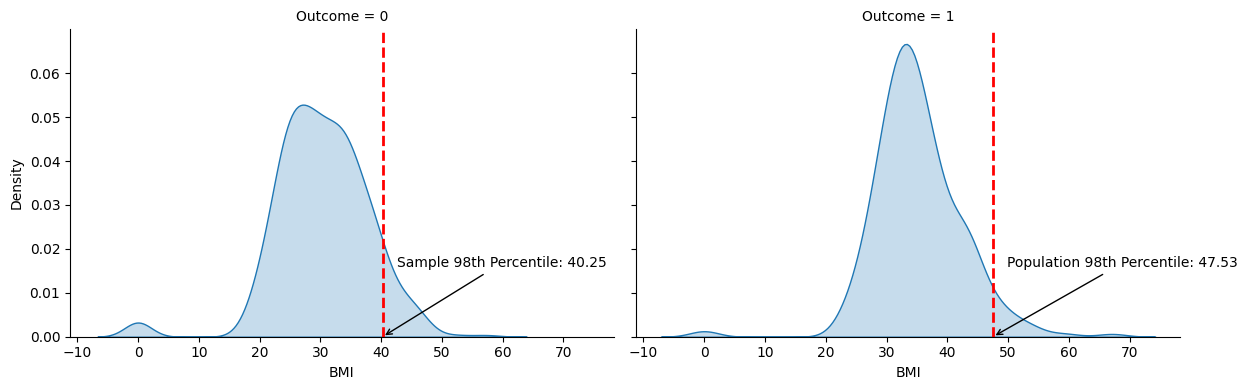

In [18]:
# Calculating the 98th percentile of BMI for the sample and the entire population
sample_98th_percentile_bmi = np.percentile(sample['BMI'], 98)
population_98th_percentile_bmi = np.percentile(df_diabetes['BMI'], 98)
# Create a faceted density plot with annotations
grid = sns.FacetGrid(df_diabetes, col="Outcome", height=4, aspect=1.5)
grid.map(sns.kdeplot, "BMI", fill=True)
grid.set_axis_labels("BMI", "Density")

# Add vertical lines for the 98th percentile
grid.axes[0, 0].axvline(sample_98th_percentile_bmi, color='red', linestyle='dashed', linewidth=2)
grid.axes[0, 1].axvline(population_98th_percentile_bmi, color='red', linestyle='dashed', linewidth=2)

# Add annotations
grid.axes[0, 0].annotate(f'Sample 98th Percentile: {round(sample_98th_percentile_bmi, 2)}',
                        xy=(sample_98th_percentile_bmi, 0), xytext=(10, 50),
                        textcoords='offset points', arrowprops=dict(arrowstyle="->"))
grid.axes[0, 1].annotate(f'Population 98th Percentile: {round(population_98th_percentile_bmi, 2)}',
                        xy=(population_98th_percentile_bmi, 0), xytext=(10, 50),
                        textcoords='offset points', arrowprops=dict(arrowstyle="->"))

# Save the plot
results_dir = '/Users/revanthkumarkanapala/Desktop/pds3/results'
plt.savefig(os.path.join(results_dir, '98percentile.png'))

plt.show()
